The dataset contains the following columns:

1. `person_age`: The age of the person.
2. `person_income`: The income of the person.
3. `person_home_ownership`: The home ownership status of the person. It can be "RENT", "OWN", or "MORTGAGE".
4. `person_emp_length`: The employment length of the person in years.
5. `loan_intent`: The intent of the loan, such as "PERSONAL", "EDUCATION", or "MEDICAL".
6. `loan_grade`: The grade of the loan, which is a rating given by the lender.
7. `loan_amnt`: The amount of the loan.
8. `loan_int_rate`: The interest rate of the loan.
9. `loan_status`: The status of the loan. It's a binary variable where 1 indicates that the person has defaulted on the loan and 0 indicates that the person has not defaulted.
10. `loan_percent_income`: The loan amount as a percentage of the person's income.
11. `cb_person_default_on_file`: A binary variable indicating whether the person has a default on file. "Y" means yes and "N" means no.
12. `cb_person_cred_hist_length`: The length of the person's credit history in years.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('dataset\credit_risk_dataset.csv')

# Display the first few rows of the dataframe
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [2]:
# Check for missing values in the dataset
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

The dataset has missing values in two columns:

1. `person_emp_length`: There are 895 missing values. This column represents the length of employment of the person.
2. `loan_int_rate`: There are 3116 missing values. This column represents the interest rate of the loan.

For handling these missing values, we have a few options:

1. **Remove rows with missing values**: This is the simplest approach but we risk losing valuable data. 
2. **Imputation with mean or median**: This is a common method for handling missing data. For the `person_emp_length` column, we can fill the missing values with the median or mean value. For the `loan_int_rate` column, as it is directly related to `loan_grade`, it would be more appropriate to fill the missing values with the median interest rate of the respective loan grade.
3. **Predictive imputation**: We could use a machine learning algorithm to predict the missing values. This is a more complex method and might not be necessary for this case.

Let's opt for the second approach. We'll impute the missing `person_emp_length` with the median of the column and `loan_int_rate` with the median interest rate of the respective loan grade. This assumes that similar loan grades would have similar interest rates. 

Let's perform these operations.

In [3]:
# Impute missing values in 'person_emp_length' with its median
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)

# Impute missing values in 'loan_int_rate' with median interest rate of the respective 'loan_grade'
df['loan_int_rate'] = df.groupby('loan_grade')['loan_int_rate'].apply(lambda x: x.fillna(x.median()))

# Check for missing values again
df.isnull().sum()


C:\Users\debjy\AppData\Local\Temp\ipykernel_15368\3648874681.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['loan_int_rate'] = df.groupby('loan_grade')['loan_int_rate'].apply(lambda x: x.fillna(x.median()))


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

The missing values in the dataset have been successfully handled. There are no more missing values in the dataset.

Next, let's take a look at the distribution of the target variable, `loan_status`, to understand if we have a balanced or imbalanced dataset. This is an important step because if the classes in the target variable are imbalanced, it can impact the performance of the machine learning model. We might need to apply some techniques to handle the imbalance. Let's examine the distribution of the `loan_status` column.

In [4]:
# Check the distribution of the target variable 'loan_status'
df['loan_status'].value_counts(normalize=True)


0    0.781836
1    0.218164
Name: loan_status, dtype: float64

The `loan_status` column, which is our target variable, is imbalanced. About 78% of the instances are of class 0 (no default) and around 22% are of class 1 (default). 

This imbalance could cause a machine learning model to be more biased towards predicting the majority class (in this case, no default), resulting in poorer performance when predicting the minority class (default).

Several techniques can be used to handle imbalanced datasets:

1. **Resampling Techniques**: This involves either oversampling the minority class, undersampling the majority class, or a combination of both.
2. **Cost-Sensitive Training**: This involves giving more weight to the minority class during model training.
3. **Data Augmentation**: This involves creating new synthetic instances of the minority class.
4. **Ensemble Methods**: This involves combining the predictions of multiple models.

We can consider these techniques when we reach the model training stage.

Now, let's move to the next step and perform some exploratory data analysis (EDA) to understand the data better and identify any patterns or trends. We'll look at the distributions of the various features, their relationships with the target variable, and correlations among the features.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plot
sns.set(style="whitegrid")

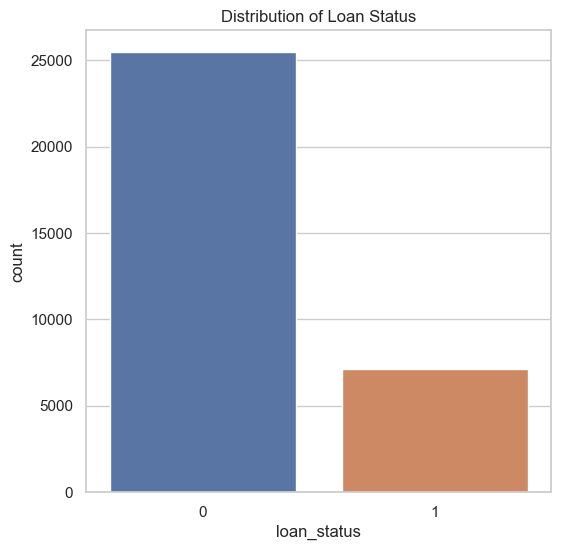

In [6]:
# Plot the distribution of target variable
plt.figure(figsize=(6, 6))
sns.countplot(x="loan_status", data=df)
plt.title("Distribution of Loan Status")
plt.show()

1. **Distribution of Loan Status**: We can see that the dataset is imbalanced as there are many more loans with no defaults (`loan_status` = 0) compared to the loans with defaults (`loan_status` = 1).

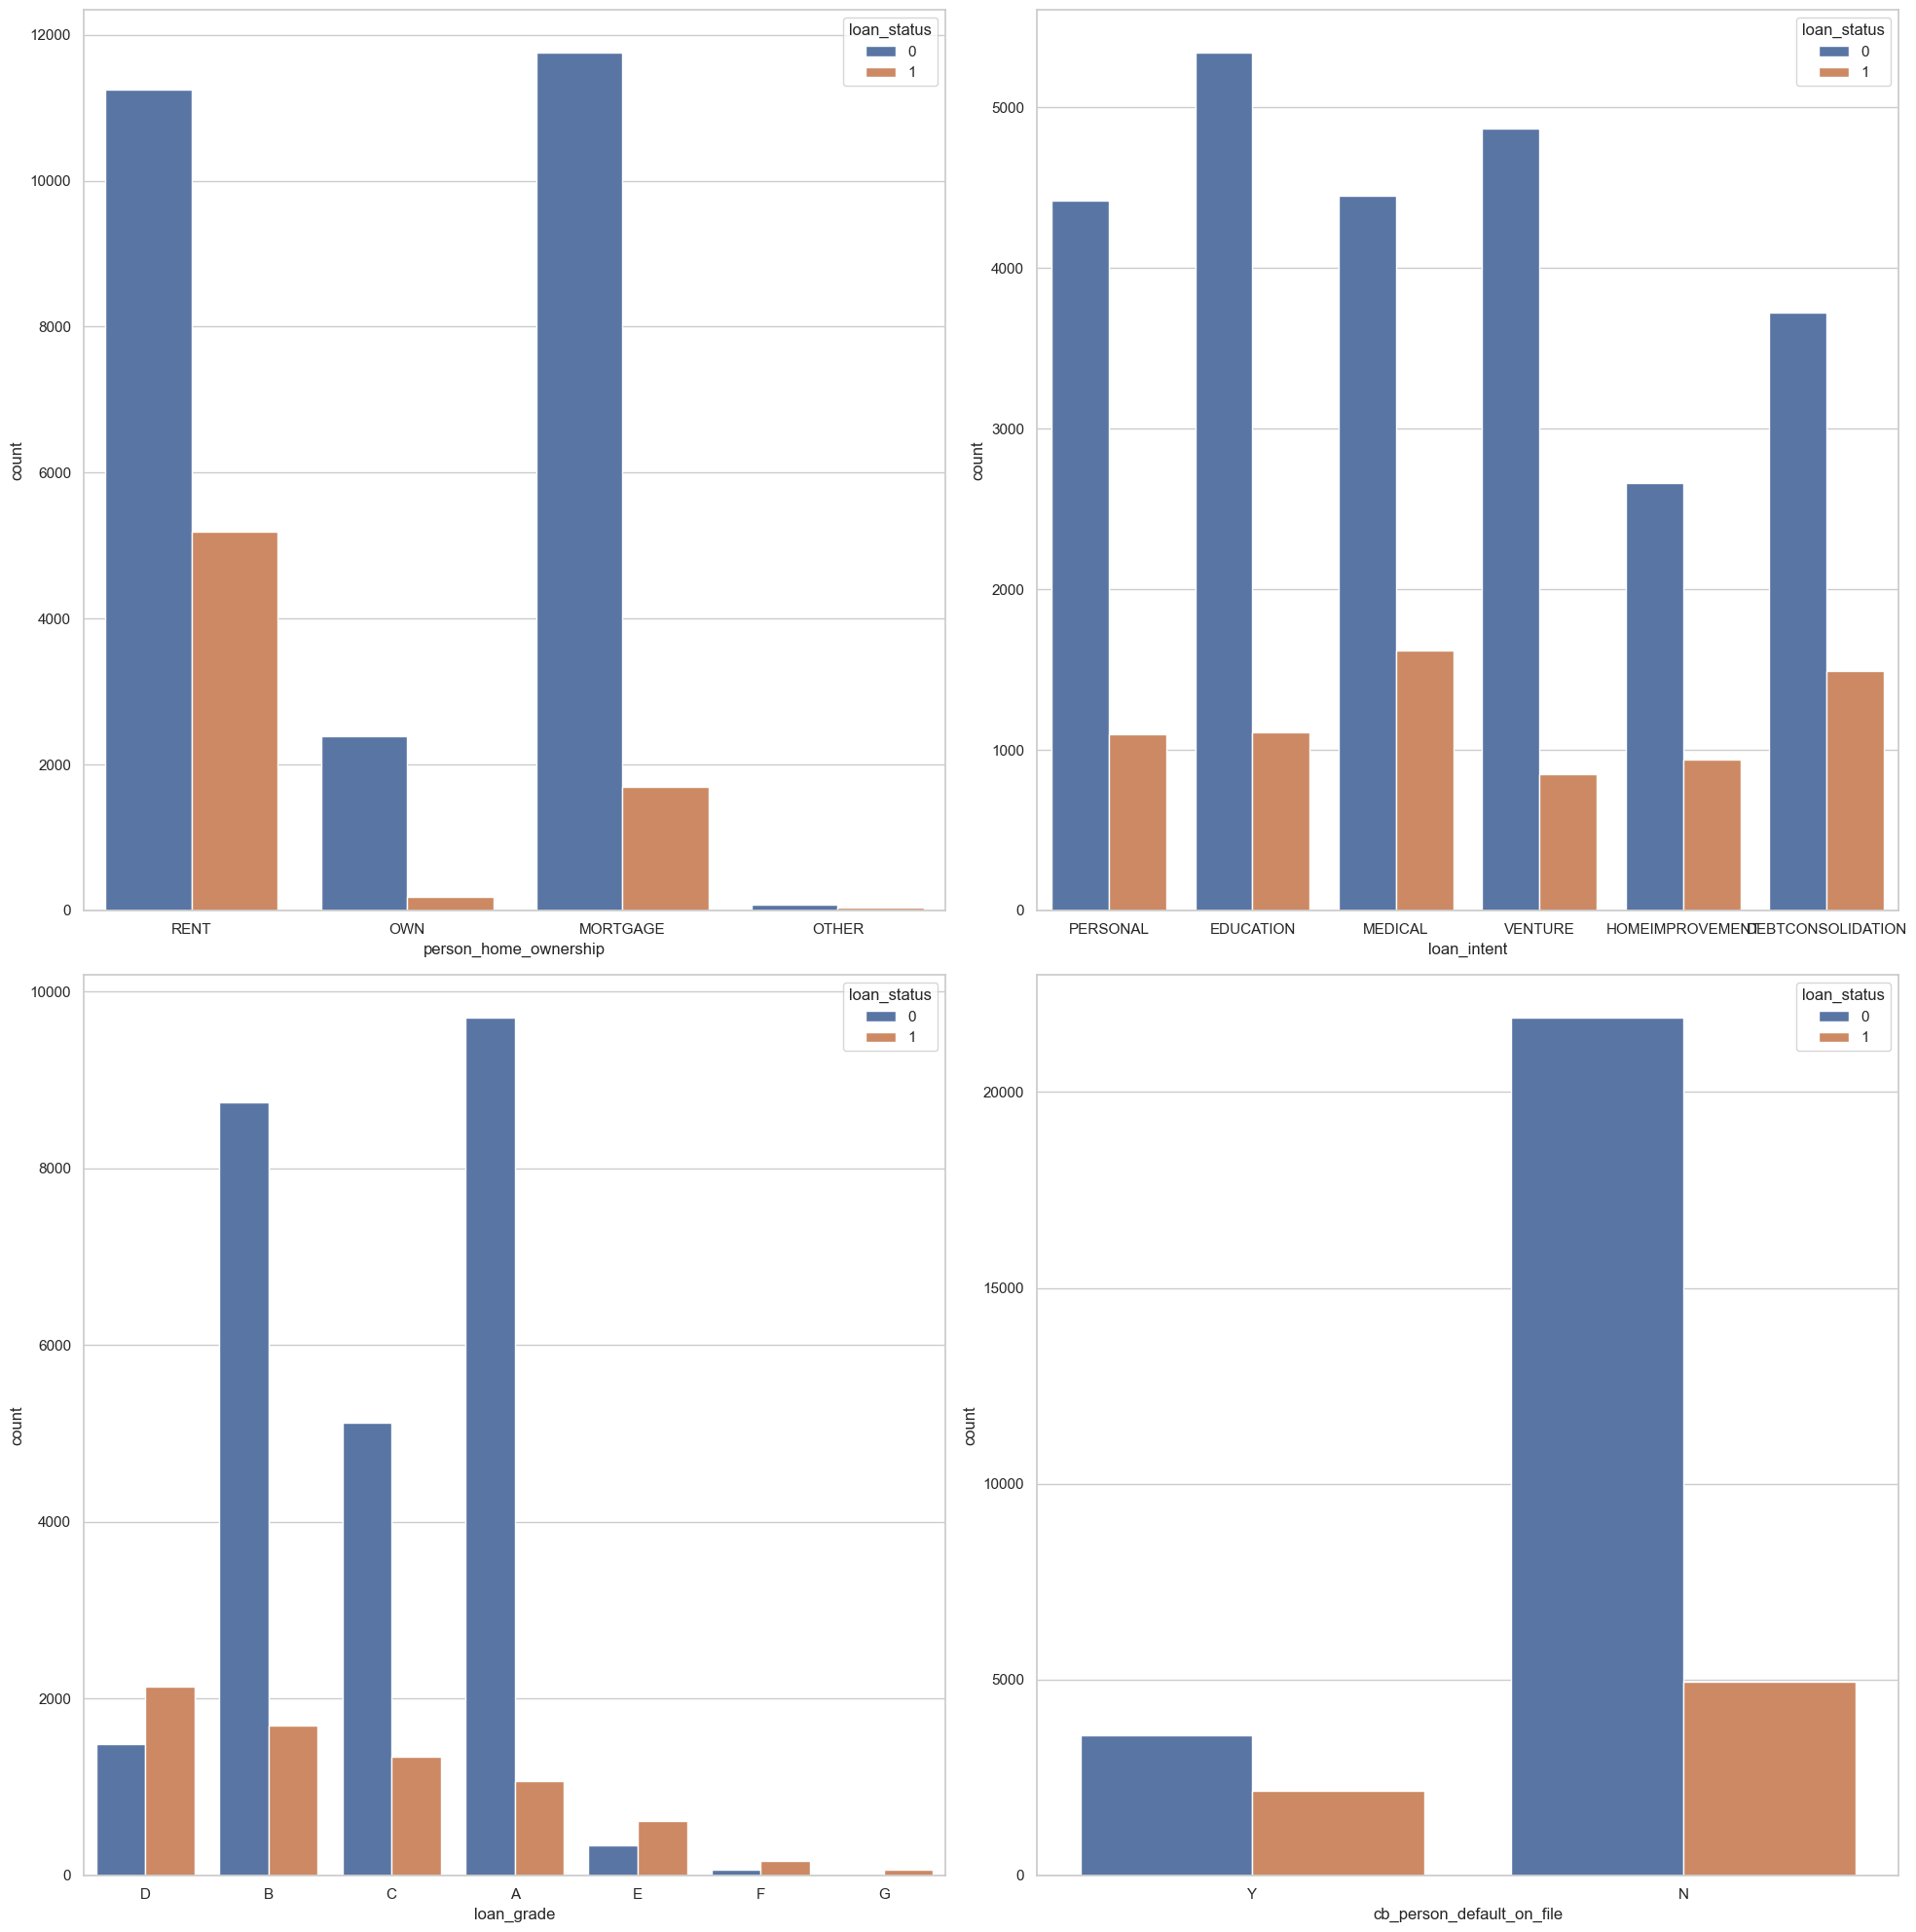

In [7]:
# Plot the distribution of categorical variables
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

for i, column in enumerate(categorical_columns):
    row = i // 2
    col = i % 2
    sns.countplot(x=column, data=df, hue='loan_status', ax=axs[row, col])

plt.tight_layout()
plt.show()

2. **Distribution of Categorical Variables**: The bar plots show the distributions of the categorical variables, with the loan status differentiated by color.
   - `person_home_ownership`: Most of the people either rent or have a mortgage. The default rates seem to be higher for people who rent or have a mortgage compared to those who own a house.
   - `loan_intent`: The loan intents are fairly evenly distributed, with 'EDUCATION' and 'MEDICAL' having slightly higher default rates.
   - `loan_grade`: Most of the loans are categorized as B and C grades. Higher grade loans (E, F, G) have a higher default rate, indicating a higher risk associated with them.
   - `cb_person_default_on_file`: People who have a default on file are more likely to default again.

C:\Users\debjy\AppData\Local\Temp\ipykernel_15368\2868494887.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


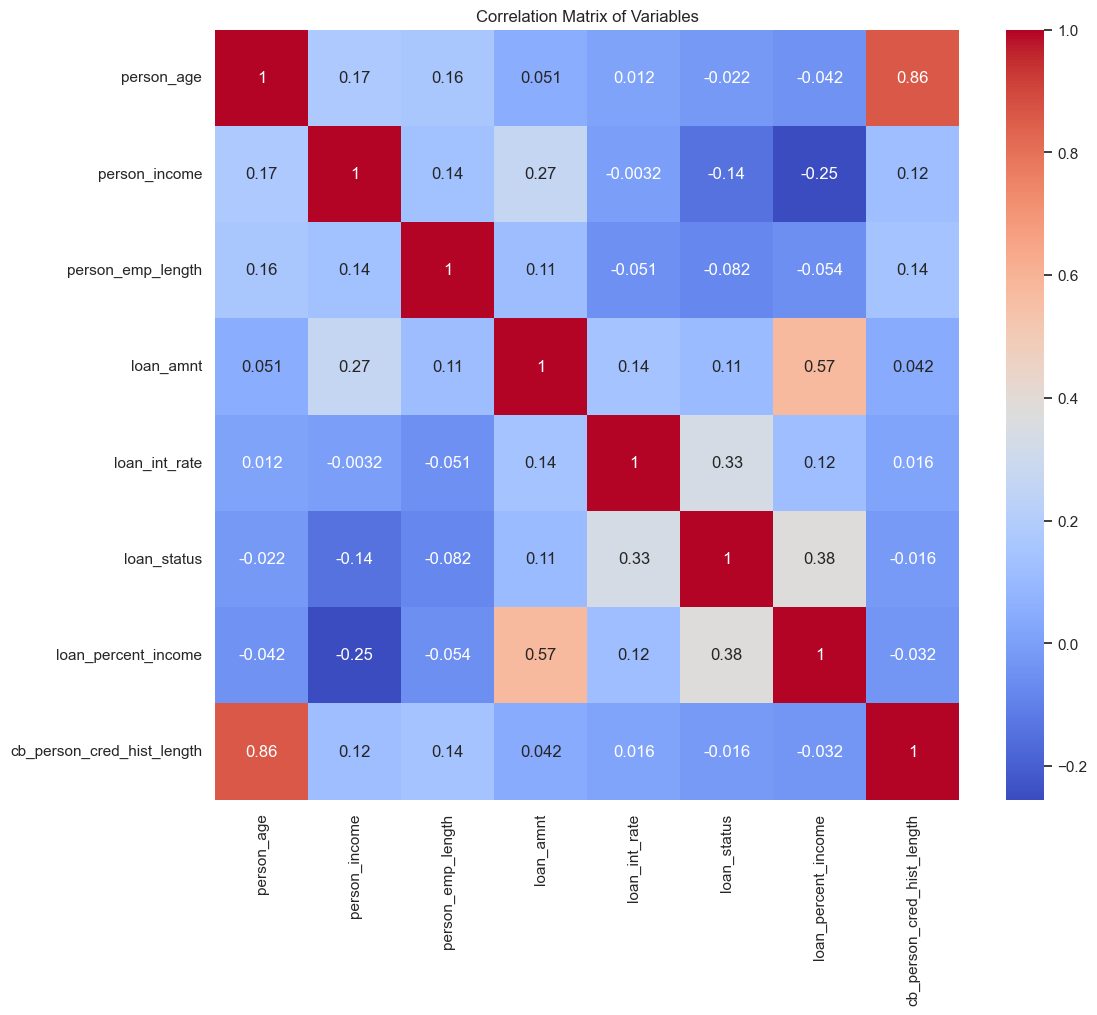

In [8]:
# Plot correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Variables")
plt.show()


3. **Correlation Matrix**: The correlation matrix shows the correlation coefficients between pairs of variables.
   - `loan_int_rate` and `loan_status` are positively correlated, indicating that higher interest rates are associated with higher default rates.
   - `person_income` and `loan_amnt` are positively correlated, indicating that people with higher income tend to borrow larger amounts.

Next, let's encode the categorical variables to prepare the data for machine learning models. We'll use one-hot encoding for categorical variables with multiple categories (`person_home_ownership`, `loan_intent`, `loan_grade`) and label encoding for binary categorical variables (`cb_person_default_on_file`).

In [9]:
from sklearn.preprocessing import LabelEncoder

# Apply one-hot encoding to categorical variables with multiple categories
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent', 'loan_grade'])

# Apply label encoding to binary categorical variables
le = LabelEncoder()
df['cb_person_default_on_file'] = le.fit_transform(df['cb_person_default_on_file'])

# Display the first few rows of the dataframe
df.head()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,22,59000,123.0,35000,16.02,1,0.59,1,3,0,...,0,1,0,0,0,0,1,0,0,0
1,21,9600,5.0,1000,11.14,0,0.10,0,2,0,...,0,0,0,0,1,0,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,0,3,1,...,1,0,0,0,0,1,0,0,0,0
3,23,65500,4.0,35000,15.23,1,0.53,0,2,0,...,1,0,0,0,0,1,0,0,0,0
4,24,54400,8.0,35000,14.27,1,0.55,1,4,0,...,1,0,0,0,0,1,0,0,0,0


The categorical variables in the dataset have been successfully encoded. 

Here's what the data looks like now:

1. For `person_home_ownership`, `loan_intent`, and `loan_grade`, each category is now a separate binary feature (0 or 1).
2. For `cb_person_default_on_file`, the values have been transformed to 0 (for 'N') and 1 (for 'Y').

Now that our data is ready, we can split it into a training set and a test set. Then we can proceed to train a baseline machine learning model. Let's use a Random Forest Classifier for our baseline model since it can handle both numerical and categorical data well, and generally provides a good performance.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the features and target
X = df.drop('loan_status', axis=1) # Features
y = df['loan_status'] # Target

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Instantiate the RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

# Train the model
rfc.fit(X_train, y_train)

# Make predictions
y_pred = rfc.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print accuracy score
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5095
           1       0.97      0.72      0.83      1422

    accuracy                           0.94      6517
   macro avg       0.95      0.86      0.89      6517
weighted avg       0.94      0.94      0.93      6517

Accuracy Score:  0.9350928341261316


The baseline Random Forest model achieved an accuracy of approximately 93.5% on the test set. However, accuracy is not always an appropriate measure, especially when dealing with imbalanced datasets like ours. Let's look at other evaluation metrics:

- **Precision**: This is the ratio of true positives (actual defaults correctly predicted as defaults) to all positives predicted by the model. The precision for class 0 is 0.93 and for class 1 is 0.97.
- **Recall (Sensitivity)**: This is the ratio of true positives to all actual positives. The recall for class 0 is 0.99, and for class 1 is 0.72.
- **F1-Score**: This is the harmonic mean of Precision and Recall, and is a better measure than accuracy, especially for imbalanced datasets. The F1-score for class 0 is 0.96, and for class 1 is 0.83.

We can see that while the model performs well in identifying non-defaults (class 0), it struggles a bit with identifying defaults (class 1). This is likely due to the imbalanced nature of our dataset.

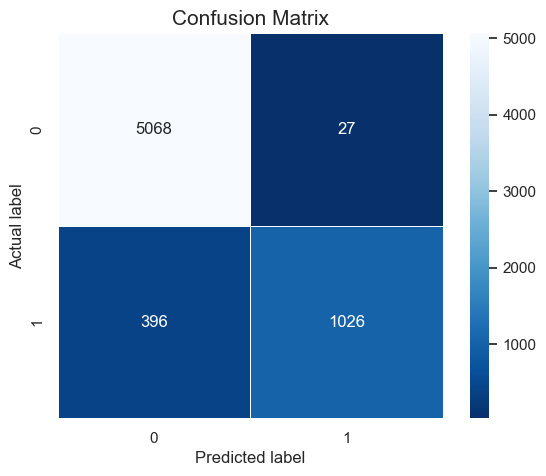

In [11]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualizing the confusion matrix using seaborn
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix', size=15)
plt.show()

The confusion matrix further illustrates this:
- Out of 5095 actual non-defaults, the model correctly predicted 5068 (True Negatives), but incorrectly predicted 27 as defaults (False Positives).
- Out of 1422 actual defaults, the model correctly predicted 1026 (True Positives), but incorrectly predicted 396 as non-defaults (False Negatives).

As we can see, the number of False Negatives is quite high, meaning the model has a higher tendency to predict a default as a non-default.

To improve this, we can try several techniques such as resampling the dataset, using different algorithms, adjusting the class weights, or applying ensemble methods. 

If we proceed with resampling the dataset using the SMOTE (Synthetic Minority Over-sampling Technique) method, which will create synthetic samples of the minority class (defaults) to balance the dataset. Then we can retrain our model and evaluate its performance.

In [12]:
import joblib

# Save the Random Forest model
joblib.dump(rfc, r'saved_model\rfc.pkl')

['saved_model\\rfc.pkl']

In [13]:
# Save the column order
column_order = X_train.columns.tolist()
joblib.dump(column_order, r'saved_model\column_order.pkl')


['saved_model\\column_order.pkl']

In [14]:
!streamlit run main.py

^C
